PROBLEM  : Build a binary prediction model that allows us to predict the likelihood of default of a consumer. 

APPROACH : 
After observing the dataset initially, it was understood that the target variable is "loan_default". The target variable has two values '0' or '1'. This helped understand that the above problem can be solved by Supervised Learning Classification Approach.




Roadmap followed for the problem :

1) EXPLORATORY DATA ANALYSIS : Analysing the dataset and trying to understand the values, what they represent etc.

2) FEATURE ENGINEERING : This stage involves converting the values in the dataset into the type which can be easily interpreted    by the ML model.

3) FEATURE SELECTION : Deciding on which features should be fed to the model and which should be dropped.

4) MODEL CREATION : Since this is a supervised classification problem the following algorithms will be applied - Decision Tree, 
   Naive Bayes, Random Forest, Logistic Regression, K- nearest neighbour. Hyperparameter Optimization was applied to each one of    them inorder to obtain an accurate model.

# EXPLORATORY DATA ANALYSIS

Brief Description of EDA : 
    
1) Observed the columns, shape, values in the dataset.

2) Observed the number of unique values in each feature.

3) Observed the datatypes of the features.

4) The "3.286%" of missing categorical values in Employment.Type was handled by utilizing the mode value of the column.

5) No duplicate values found.


Analysed :

1) The value count and histogram of unique values in Aadhar_flag, PAN_flag, VoterID_flag, Driving_flag, Passport_flag, Employment.Type.

2) The value distribution of Loan default

3) Histogram, Distribution Plot, Transformation and Transformed plot for Disbursed Amount, asset_cost, ltv, PERFORM_CNS.SCORE,  PRIMARY.INSTAL.AMT, SEC.INSTAL.AMT.
   Used log tranforms for all values except ltv as resultant skew was high. used boxcox for ltv



4) How Disbursed Amount, asset_cost, ltv values are distributed wrt Employment type by plotting grouped boxplots
   
5) Histograms for State_ID, manufacturer_id, branch_id, supplier_id, NO.OF_INQUIRIES, Current_pincode_ID, Employee_code_ID, DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, NEW.ACCTS.IN.LAST.SIX.MONTHS

6) The cross tabulation between [ State_ID, manufacturer_id, branch_id, supplier_id, NO.OF_INQUIRIES, Current_pincode_ID, Employee_code_ID, DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, NEW.ACCTS.IN.LAST.SIX.MONTHS ] with "loan_default" to understand the how the values are related to the default of loans. 

7) Unique values in PERFORM_CNS.SCORE.DESCRIPTION, plotted the categorical plot for unique values with disbursed_amount, asset_cost, ltv, PRIMARY.INSTAL.AMT, SEC.INSTAL.AMT

8) Distributions of PRI.NO.OF.ACCTS, PRI.ACTIVE.ACCTS, PRI.OVERDUE.ACCTS, PRI.CURRENT.BALANCE, PRI.SANCTIONED.AMOUNT, PRI.DISBURSED.AMOUNT

9) Distributions of SEC.NO.OF.ACCTS, SEC.ACTIVE.ACCTS, SEC.OVERDUE.ACCTS, SEC.CURRENT.BALANCE, SEC.SANCTIONED.AMOUNT, SEC.DISBURSED.AMOUNT

10) Correlation heatmap, isolated values above 0.7.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [4]:
df_train.shape

(233154, 41)

In [5]:
df_train.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [6]:
df_train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [7]:
#checking datatypes
df_train.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [8]:
#checking unique values
df_train.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

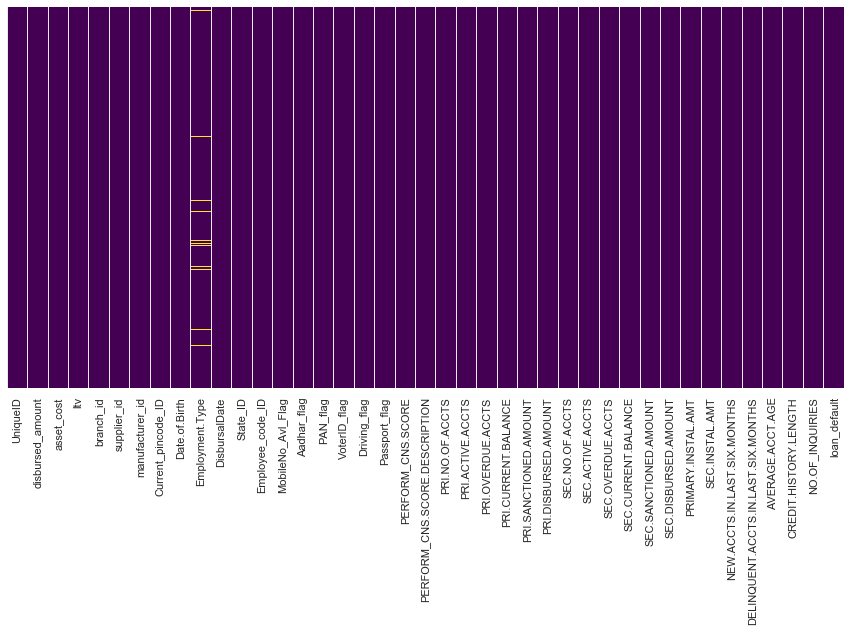

In [9]:
#plotting missing values
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(df_train.isnull(), yticklabels= False, cbar=False, cmap ='viridis')

In [10]:
#number of missing values
df_train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [11]:
#percent of missing values
percent_missing = df_train["Employment.Type"].isnull().sum() * 100 / len(df_train)
print(round(percent_missing,3))

3.286


In [12]:
#mode values to replace missing values
print(df_train['Employment.Type'].mode())

0    Self employed
dtype: object


In [13]:
#replacing missing values
df_train['Employment.Type'].fillna(str(df_train['Employment.Type'].mode().values[0]), inplace=True)
df_train.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [14]:
#checking for duplicate values
df_train[df_train.duplicated()]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default


In [15]:
df_train['Aadhar_flag'].value_counts()

1    195924
0     37230
Name: Aadhar_flag, dtype: int64

In [16]:
df_train['PAN_flag'].value_counts()

0    215533
1     17621
Name: PAN_flag, dtype: int64

In [17]:
df_train['VoterID_flag'].value_counts()

0    199360
1     33794
Name: VoterID_flag, dtype: int64

In [18]:
df_train['Driving_flag'].value_counts()

0    227735
1      5419
Name: Driving_flag, dtype: int64

In [19]:
df_train['Passport_flag'].value_counts()

0    232658
1       496
Name: Passport_flag, dtype: int64

In [20]:
df_train['Employment.Type'].value_counts()

Self employed    135296
Salaried          97858
Name: Employment.Type, dtype: int64

[Text(0, 0.5, ' '), Text(0.5, 0, ' '), Text(0.5, 1.0, 'Employment Type')]

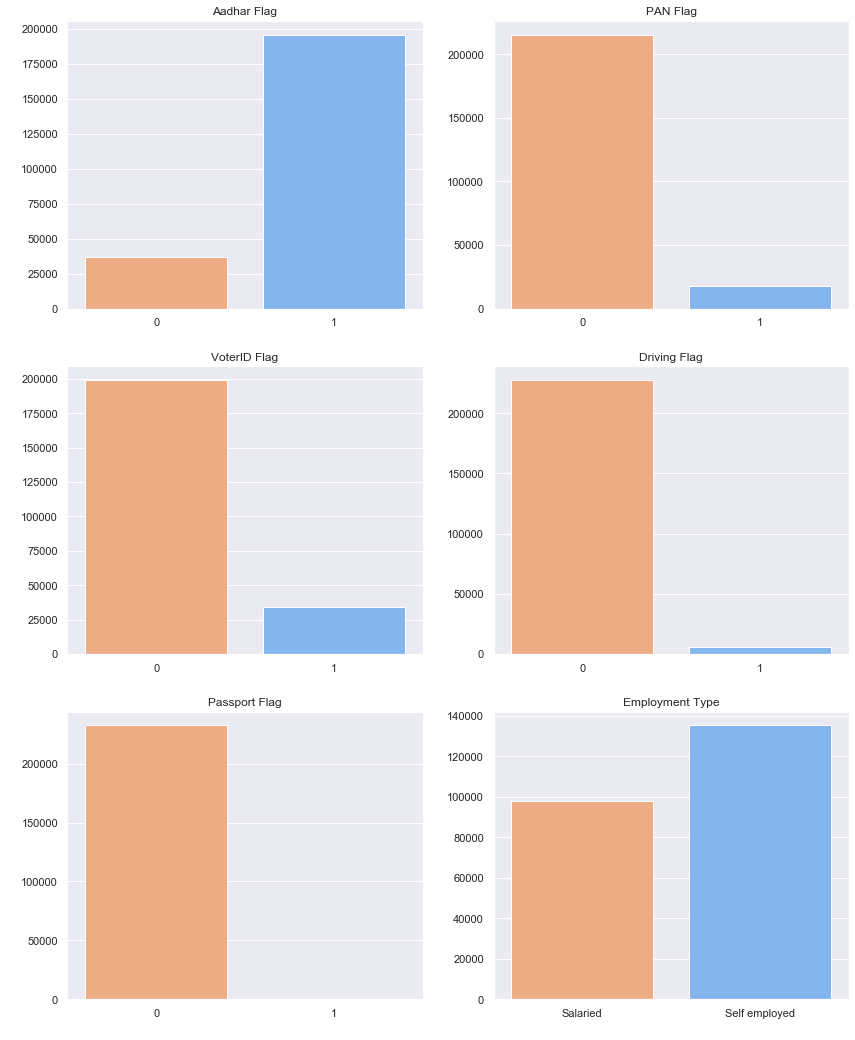

In [21]:
sns.set(rc={'figure.figsize':(14,18)})
fig, ax =plt.subplots(3,2)
sns.countplot(df_train["Aadhar_flag"], palette=["#ffa872", "#72b4ff"], ax=ax[0,0]).set(title='Aadhar Flag', xlabel= " ", ylabel=" ")
sns.countplot(df_train["PAN_flag"], palette=["#ffa872", "#72b4ff"], ax=ax[0,1]).set(title='PAN Flag', xlabel= " ", ylabel=" ")
sns.countplot(df_train["VoterID_flag"], palette=["#ffa872", "#72b4ff"], ax=ax[1,0]).set(title='VoterID Flag', xlabel= " ", ylabel=" ")
sns.countplot(df_train["Driving_flag"], palette=["#ffa872", "#72b4ff"], ax=ax[1,1]).set(title='Driving Flag', xlabel= " ", ylabel=" ")
sns.countplot(df_train["Passport_flag"], palette=["#ffa872", "#72b4ff"], ax=ax[2,0]).set(title='Passport Flag', xlabel= " ", ylabel=" ")
sns.countplot(df_train["Employment.Type"], palette=["#ffa872", "#72b4ff"], ax=ax[2,1]).set(title='Employment Type', xlabel= " ", ylabel=" ")

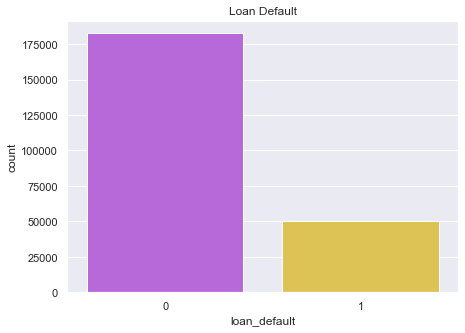

In [22]:
sns.set(rc={'figure.figsize':(7,5)})
plt.title('Loan Default')
sns.countplot(df_train["loan_default"], palette=["#BF55EC", "#F4D03F"])

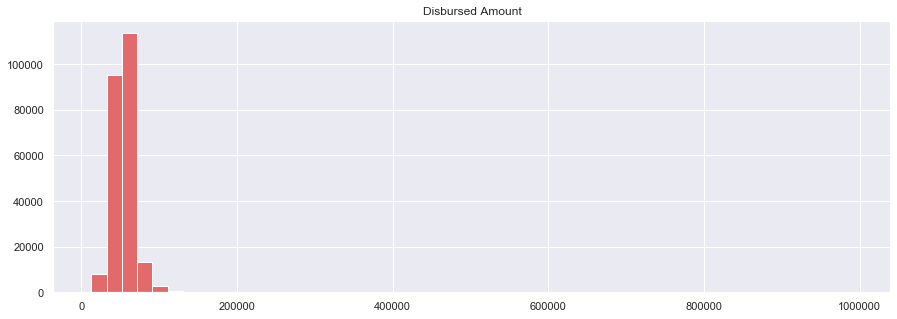

In [23]:
plt.figure(figsize=(15,5))
plt.title('Disbursed Amount')
df_train['disbursed_amount'].hist(bins=50, color = "#E26A6A")

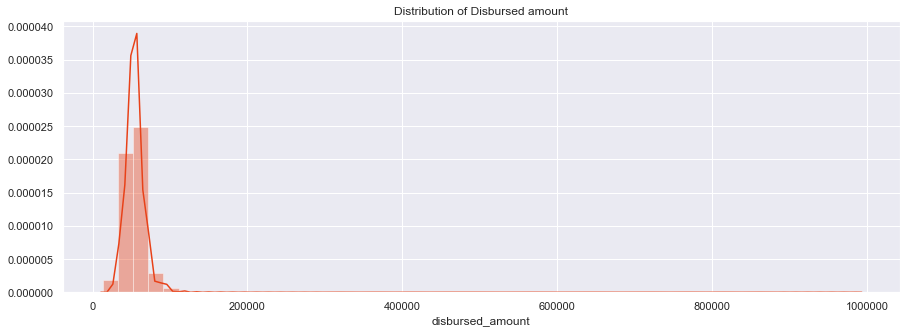

In [24]:
sns.set(rc={'figure.figsize':(15,5)})
plt.title('Distribution of Disbursed amount')
sns.distplot(df_train["disbursed_amount"], color ="#e84118")

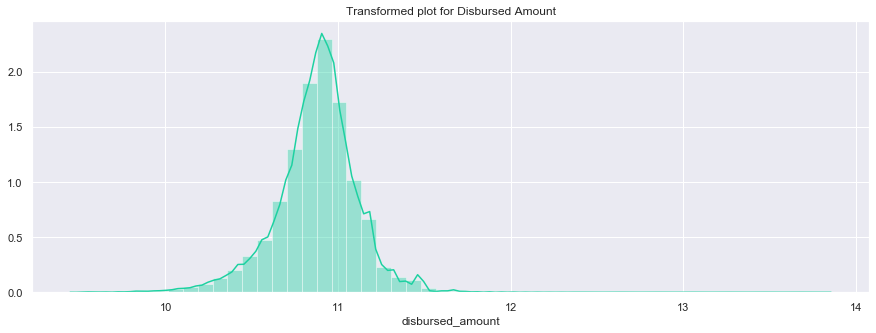

In [25]:
#log transform
df_train['disbursed_amount'] = np.log(df_train['disbursed_amount'])
plt.title('Transformed plot for Disbursed Amount')
sns.distplot(df_train["disbursed_amount"], color = "#1dd1a1")

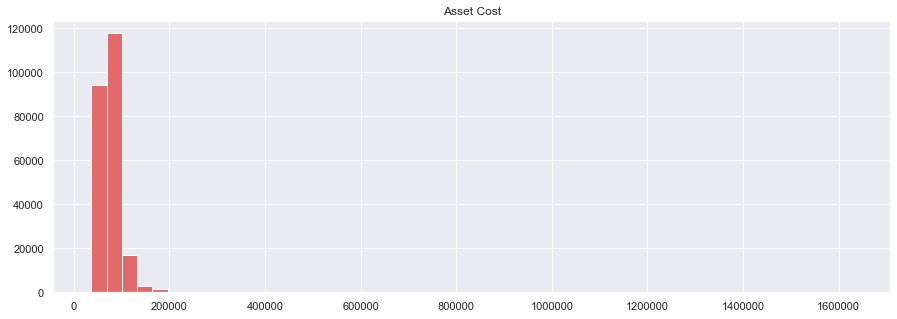

In [26]:
plt.title('Asset Cost')
df_train['asset_cost'].hist(bins=50, color = "#E26A6A")

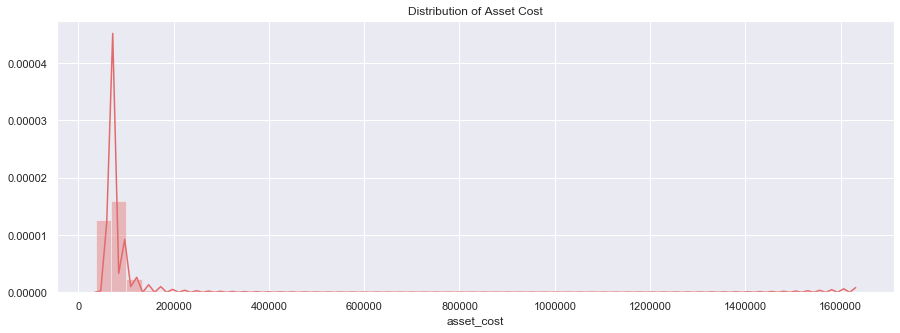

In [27]:
plt.title("Distribution of Asset Cost")
sns.distplot(df_train["asset_cost"], color ="#E26A6A")

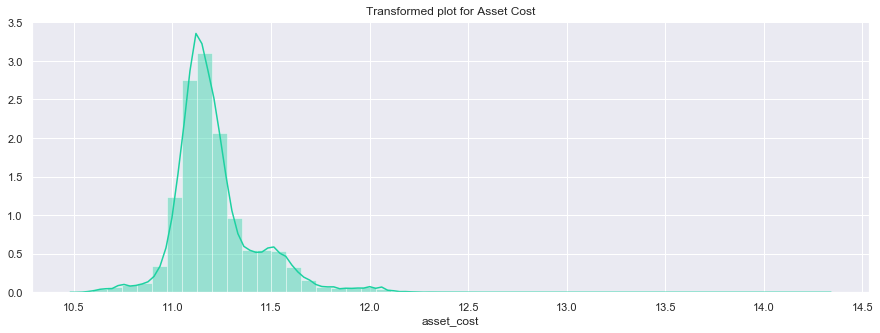

In [28]:
#log tranform
df_train['asset_cost'] = np.log(df_train['asset_cost'])
plt.title('Transformed plot for Asset Cost')
sns.distplot(df_train["asset_cost"], color = "#1dd1a1")

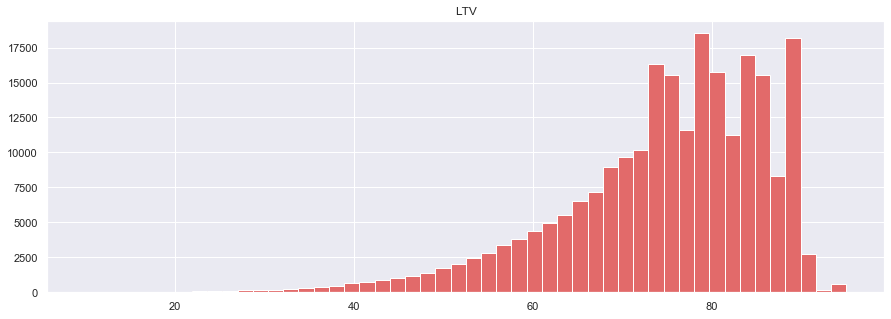

In [29]:
plt.title('LTV')
df_train['ltv'].hist(bins=50, color = "#E26A6A")

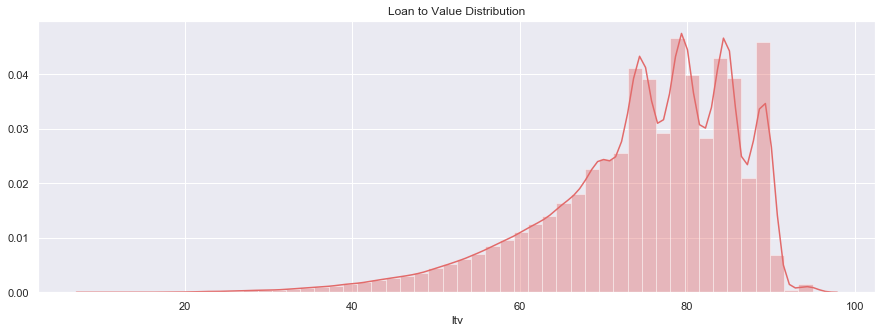

In [30]:
plt.title('Loan to Value Distribution')
sns.distplot(df_train["ltv"], color ="#E26A6A")

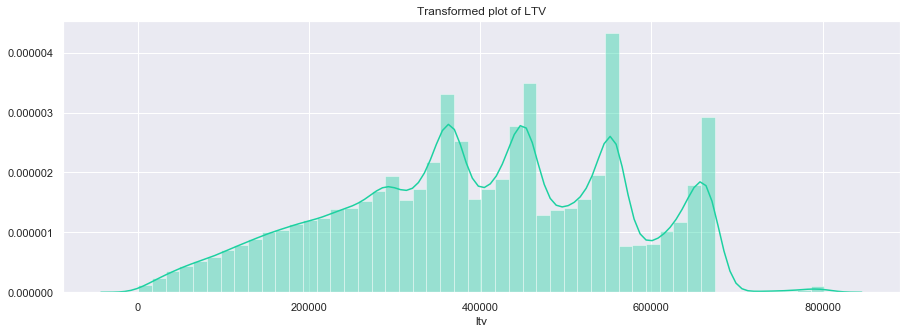

In [31]:
#boxcox tranform
from scipy import stats
df_train["ltv"] = stats.boxcox(df_train['ltv'])[0]
plt.title('Transformed plot of LTV')
sns.distplot(df_train["ltv"], color = "#1dd1a1")

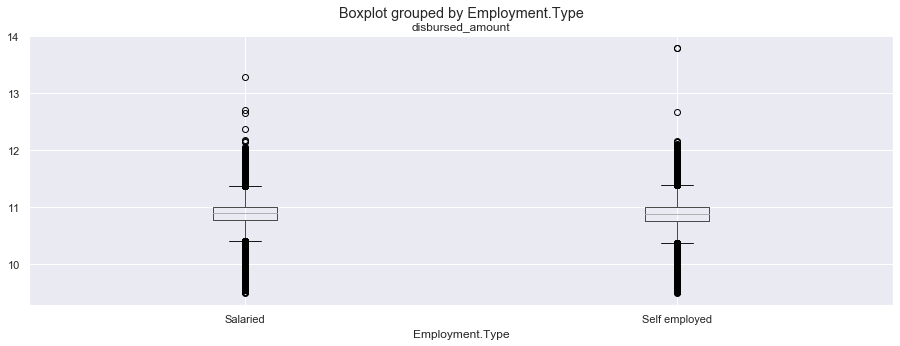

In [32]:
#grouped boxplots
df_train.boxplot(column='disbursed_amount', by = 'Employment.Type')

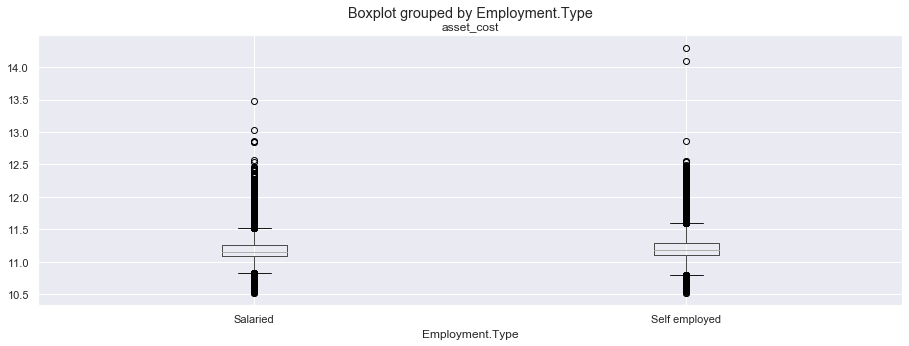

In [33]:
df_train.boxplot(column='asset_cost', by = 'Employment.Type')

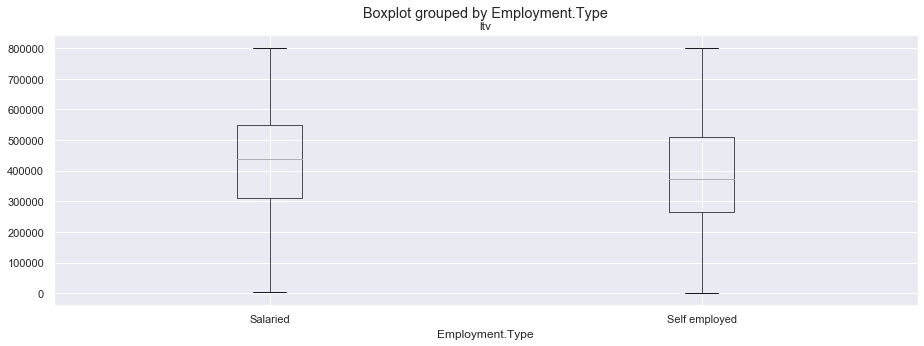

In [34]:
df_train.boxplot(column='ltv', by = 'Employment.Type')

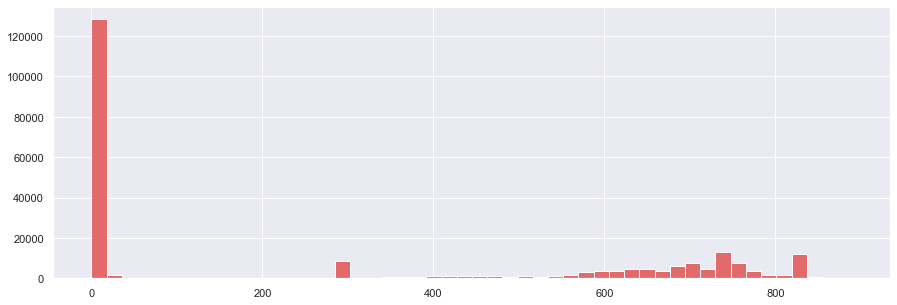

In [35]:
plt.figure(figsize=(15,5))
df_train['PERFORM_CNS.SCORE'].hist(bins=50, color = "#E26A6A")

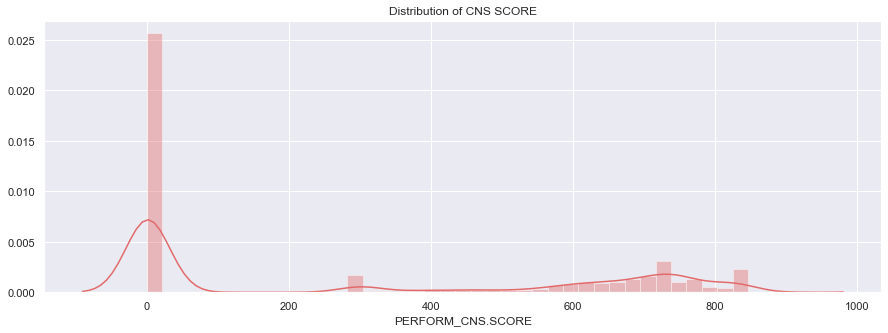

In [36]:
plt.title('Distribution of CNS SCORE')
sns.distplot(df_train["PERFORM_CNS.SCORE"], color ="#E26A6A")

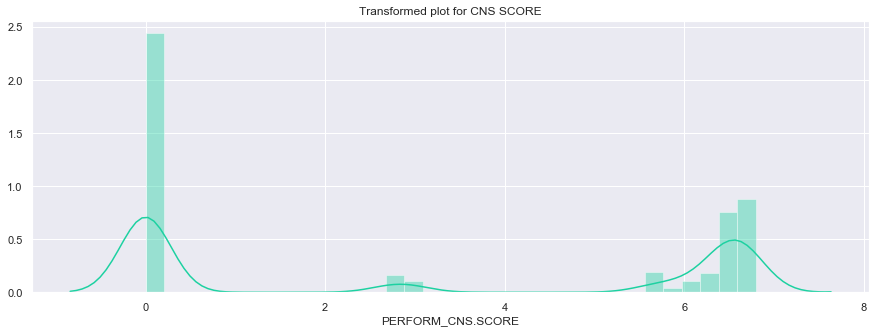

In [37]:
#log transform
df_train['PERFORM_CNS.SCORE'] = np.log1p(df_train['PERFORM_CNS.SCORE'])
plt.title('Transformed plot for CNS SCORE')
sns.distplot(df_train["PERFORM_CNS.SCORE"], color ="#1dd1a1")

[Text(0.5, 1.0, 'SECONDARY AMOUNT')]

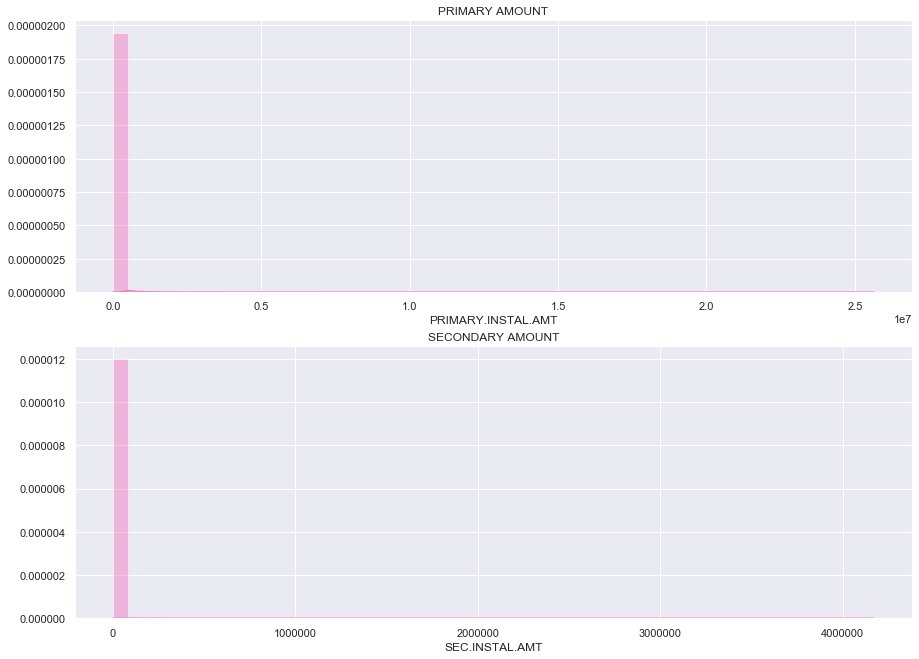

In [38]:
sns.set(rc={'figure.figsize':(15,11)})
fig, ax =plt.subplots(2,1)
sns.distplot(df_train["PRIMARY.INSTAL.AMT"], color = "#f567bc" , kde_kws={'bw': 0.1}, ax=ax[0]).set(title = "PRIMARY AMOUNT")
sns.distplot(df_train["SEC.INSTAL.AMT"], color = "#f567bc" , kde_kws={'bw': 0.1}, ax=ax[1]).set(title = "SECONDARY AMOUNT")

[Text(0.5, 1.0, 'Tranformed plot for Secondary AMOUNT')]

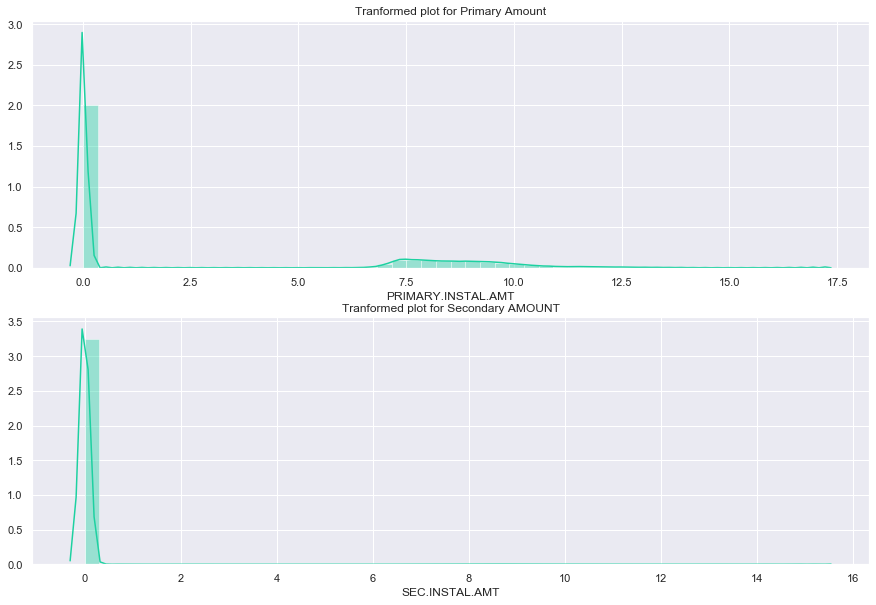

In [39]:
#log transform
df_train['PRIMARY.INSTAL.AMT'] = np.log1p(df_train['PRIMARY.INSTAL.AMT'])
df_train['SEC.INSTAL.AMT'] = np.log1p(df_train['SEC.INSTAL.AMT'])

sns.set(rc={'figure.figsize':(15,10)})
fig, ax =plt.subplots(2,1)
sns.distplot(df_train["PRIMARY.INSTAL.AMT"], color = "#1dd1a1" , kde_kws={'bw': 0.1}, ax=ax[0]).set(title = "Tranformed plot for Primary Amount")
sns.distplot(df_train["SEC.INSTAL.AMT"], color = "#1dd1a1" , kde_kws={'bw': 0.1}, ax=ax[1]).set(title = "Tranformed plot for Secondary AMOUNT")

In [40]:
#cross tabulation for comparison wrt loan default 

In [41]:
comparison_1 = pd.crosstab(df_train['State_ID'],df_train['loan_default'],margins = True)
comparison_1

loan_default,0,1,All
State_ID,,,
1,7353,1583,8936
2,3031,1129,4160
3,27733,6345,34078
4,35544,9326,44870
5,8154,2023,10177
6,26615,6890,33505
7,5417,1369,6786
8,10939,3258,14197
9,12530,3492,16022


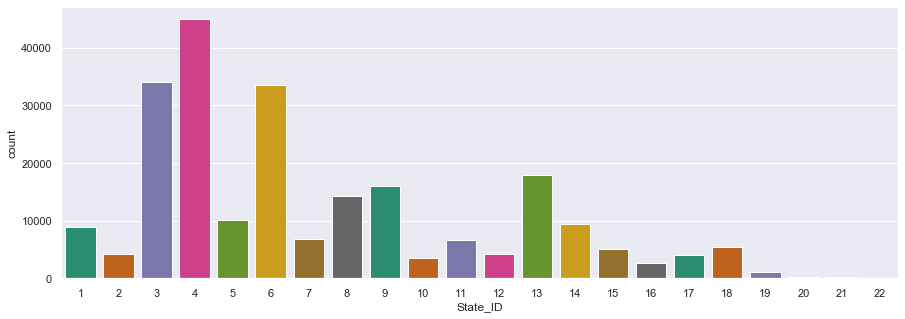

In [42]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["State_ID"], palette= "Dark2")

In [43]:
comparison_2 = pd.crosstab(df_train['manufacturer_id'],df_train['loan_default'],margins = True)
comparison_2

loan_default,0,1,All
manufacturer_id,,,
45,43687,12939,56626
48,12156,4554,16710
49,7984,2236,10220
51,21547,5657,27204
67,1882,523,2405
86,87124,22410,109534
120,7526,2132,9658
145,622,156,778
152,6,0,6


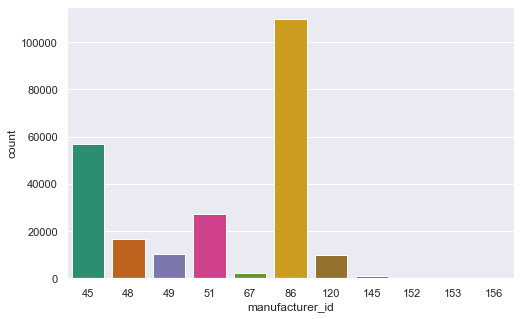

In [44]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(df_train["manufacturer_id"], palette= "Dark2")

In [45]:
comparison_3 = pd.crosstab(df_train['branch_id'],df_train['loan_default'],margins = True)
comparison_3

loan_default,0,1,All
branch_id,,,
1,4856,853,5709
2,10683,2455,13138
3,7616,1614,9230
5,7171,2047,9218
7,2566,656,3222
...,...,...,...
258,297,77,374
259,267,79,346
260,274,98,372


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 <a list of 82 Text xticklabel objects>)

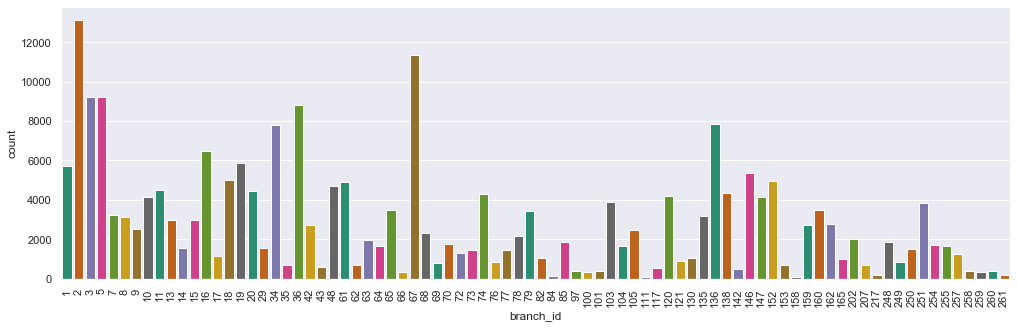

In [46]:
sns.set(rc={'figure.figsize':(17,5)})
sns.countplot(df_train["branch_id"], palette= "Dark2")
plt.xticks(rotation = 90)

In [47]:
comparison_4 = pd.crosstab(df_train['supplier_id'],df_train['loan_default'],margins = True)
comparison_4

loan_default,0,1,All
supplier_id,,,
10524,3,3,6
12311,3,0,3
12312,41,5,46
12374,85,14,99
12441,37,10,47
...,...,...,...
24797,1,1,2
24799,1,0,1
24802,2,0,2


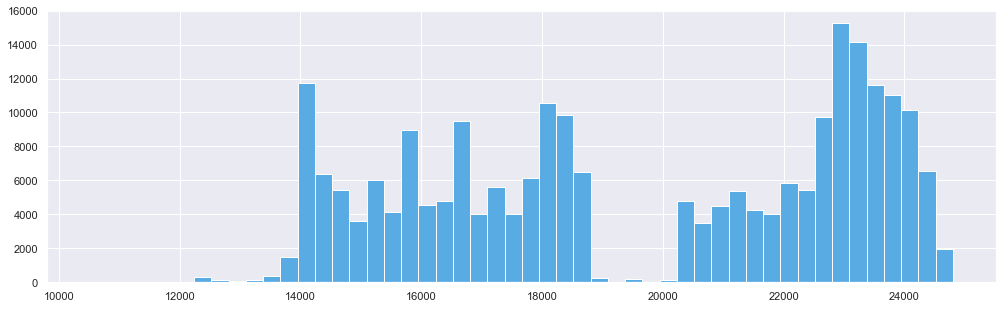

In [48]:
df_train['supplier_id'].hist(bins=50, color = "#59ABE3")

In [49]:
comparison_5 = pd.crosstab(df_train['NO.OF_INQUIRIES'],df_train['loan_default'],margins = True)
comparison_5

loan_default,0,1,All
NO.OF_INQUIRIES,,,
0,159404,42557,201961
1,16844,5441,22285
2,3918,1491,5409
3,1250,517,1767
4,526,234,760
5,212,131,343
6,148,91,239
7,80,55,135
8,61,44,105


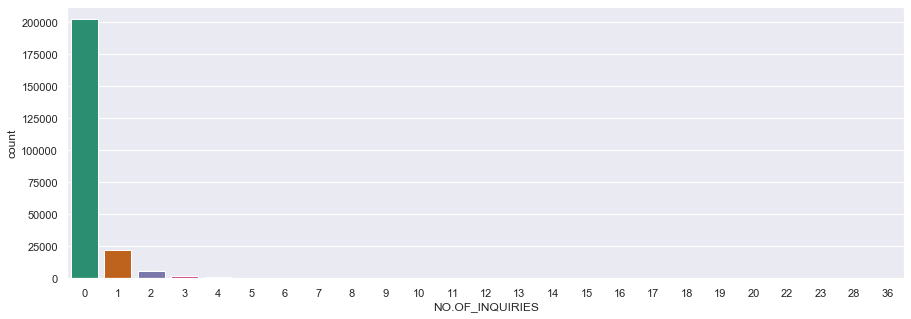

In [50]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["NO.OF_INQUIRIES"], palette= "Dark2")

In [51]:
comparison_6 = pd.crosstab(df_train['Current_pincode_ID'],df_train['loan_default'],margins = True)
comparison_6

loan_default,0,1,All
Current_pincode_ID,,,
1,20,6,26
2,59,13,72
3,44,6,50
4,73,15,88
5,157,58,215
...,...,...,...
7342,1,0,1
7343,1,1,2
7344,1,0,1


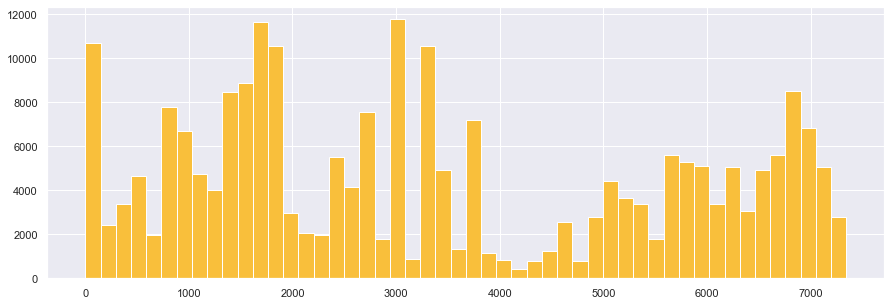

In [52]:
df_train['Current_pincode_ID'].hist(bins=50, color = "#F9BF3B")

In [53]:
comparison_7 = pd.crosstab(df_train['Employee_code_ID'],df_train['loan_default'],margins = True)
comparison_7

loan_default,0,1,All
Employee_code_ID,,,
1,59,21,80
3,83,66,149
4,46,21,67
5,80,19,99
7,128,16,144
...,...,...,...
3792,1,0,1
3793,0,1,1
3794,1,0,1


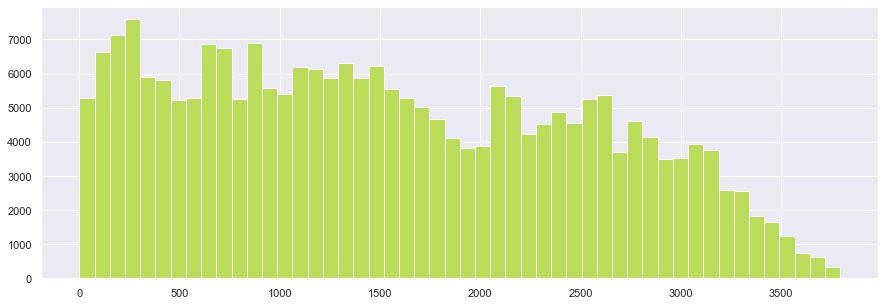

In [54]:
df_train['Employee_code_ID'].hist(bins=50, color = "#badc58")

In [55]:
comparison_8 = pd.crosstab(df_train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],df_train['loan_default'],margins = True)
comparison_8

loan_default,0,1,All
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,,,
0,169277,45682,214959
1,10922,4019,14941
2,1784,686,2470
3,385,152,537
4,96,42,138
5,42,16,58
6,17,3,20
7,8,5,13
8,4,3,7


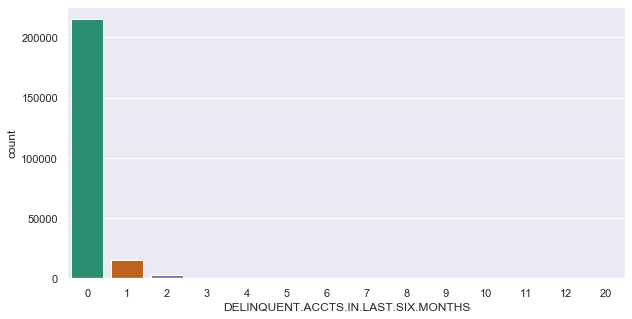

In [56]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(df_train["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"], palette= "Dark2")

In [57]:
comparison_9 = pd.crosstab(df_train['NEW.ACCTS.IN.LAST.SIX.MONTHS'],df_train['loan_default'],margins = True)
comparison_9

loan_default,0,1,All
NEW.ACCTS.IN.LAST.SIX.MONTHS,,,
0,140812,40682,181494
1,25735,6364,32099
2,8931,2084,11015
3,3690,768,4458
4,1609,348,1957
5,800,164,964
6,398,82,480
7,255,47,302
8,123,24,147


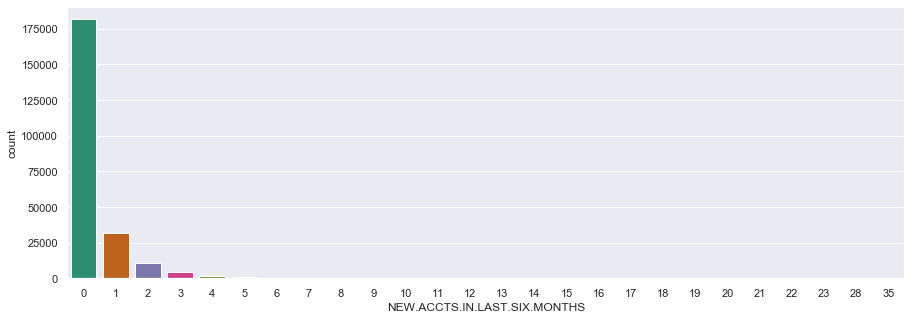

In [58]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["NEW.ACCTS.IN.LAST.SIX.MONTHS"], palette= "Dark2")

In [59]:
#unique values
df_train["PERFORM_CNS.SCORE.DESCRIPTION"].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [60]:
#categorical plots of PERFORM_CNS.SCORE.DESCRIPTION wrt various values

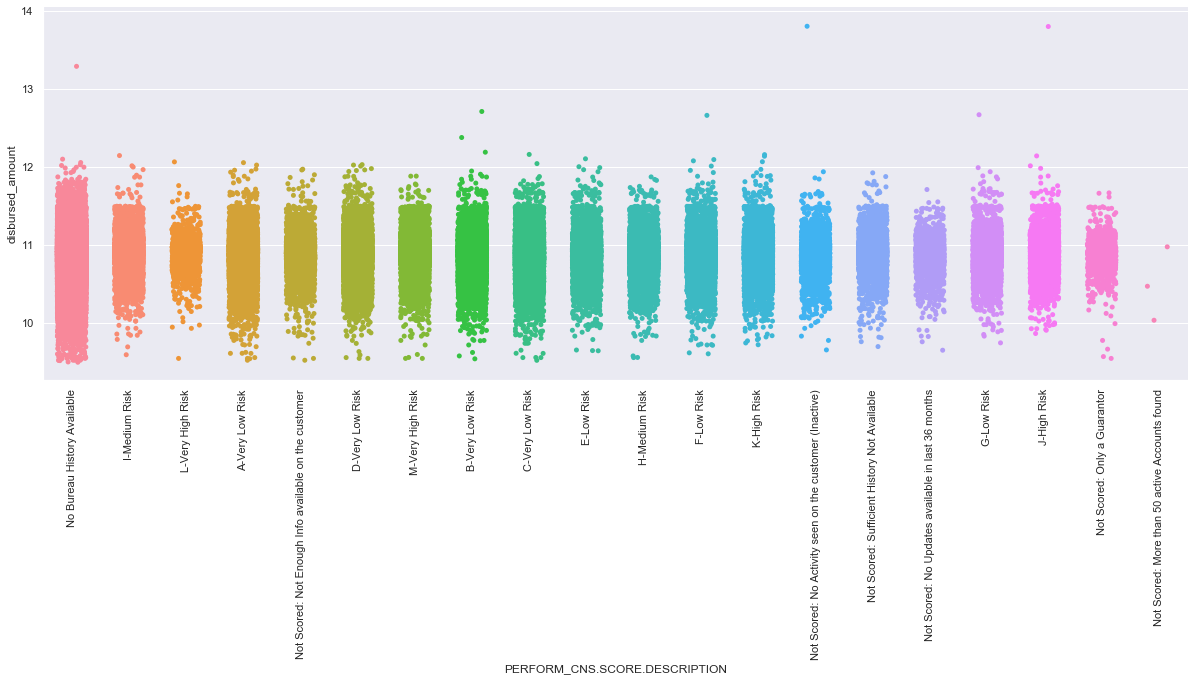

In [61]:
sns.set(rc={'figure.figsize':(15,5)})
sns.catplot(x='PERFORM_CNS.SCORE.DESCRIPTION', y='disbursed_amount', data= df_train, jitter = "0.25", height=6, aspect=3).set_xticklabels(rotation=90)

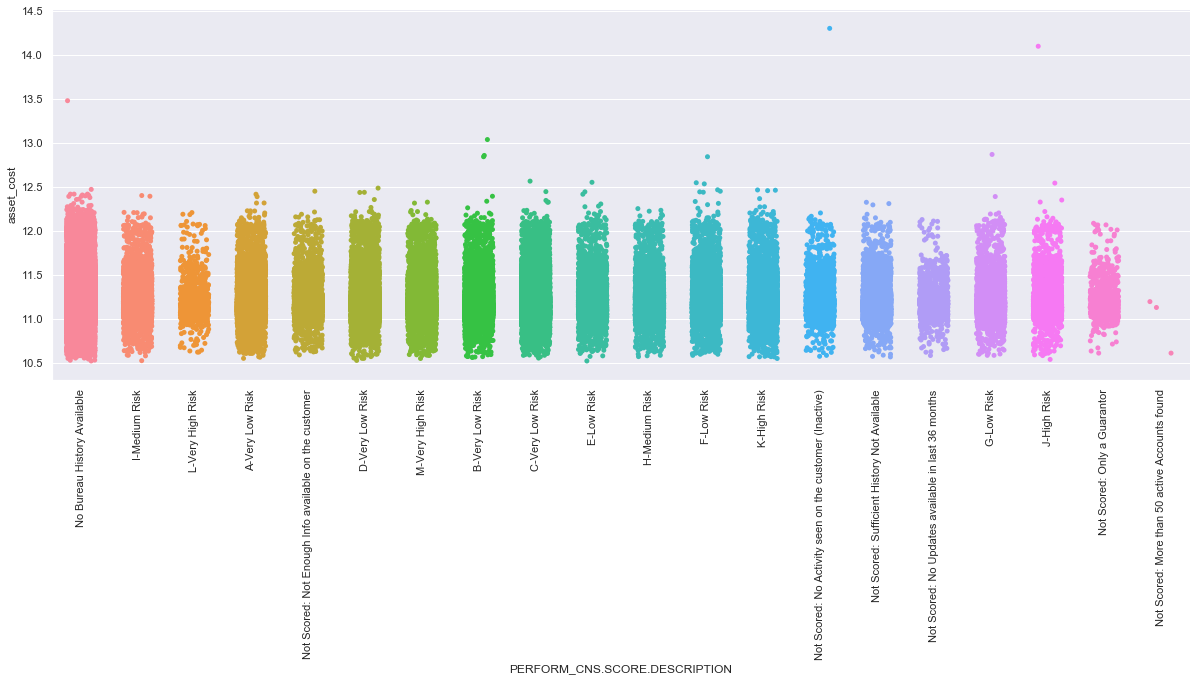

In [62]:
sns.catplot(x='PERFORM_CNS.SCORE.DESCRIPTION', y='asset_cost', data= df_train, jitter = "0.25", height=6, aspect=3).set_xticklabels(rotation=90)

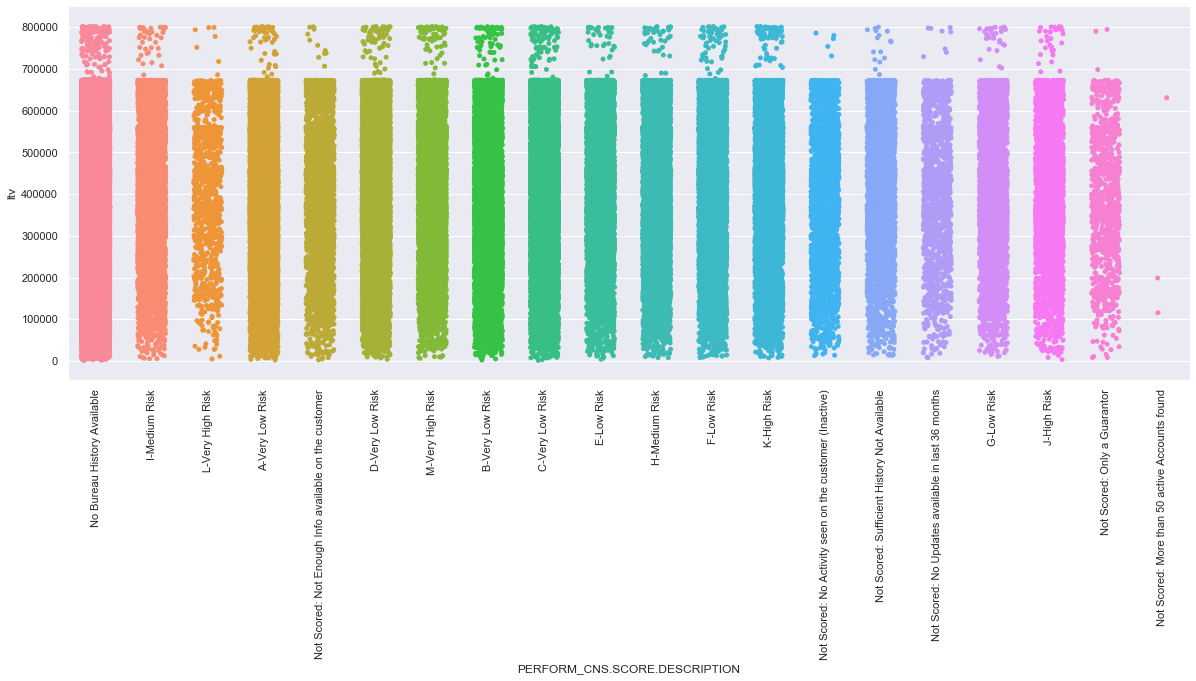

In [63]:
sns.catplot(x='PERFORM_CNS.SCORE.DESCRIPTION', y='ltv', data= df_train, jitter = "0.25", height=6, aspect=3).set_xticklabels(rotation=90)

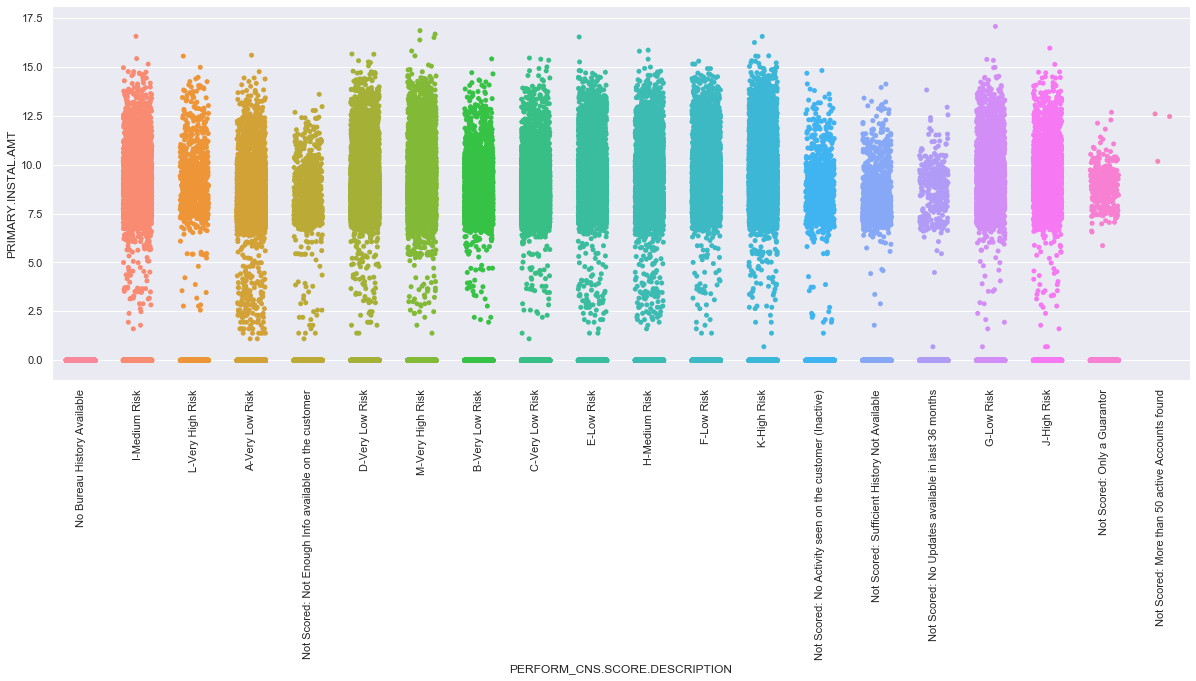

In [64]:
sns.catplot(x='PERFORM_CNS.SCORE.DESCRIPTION', y='PRIMARY.INSTAL.AMT', data= df_train, jitter = "0.25", height=6, aspect=3).set_xticklabels(rotation=90)

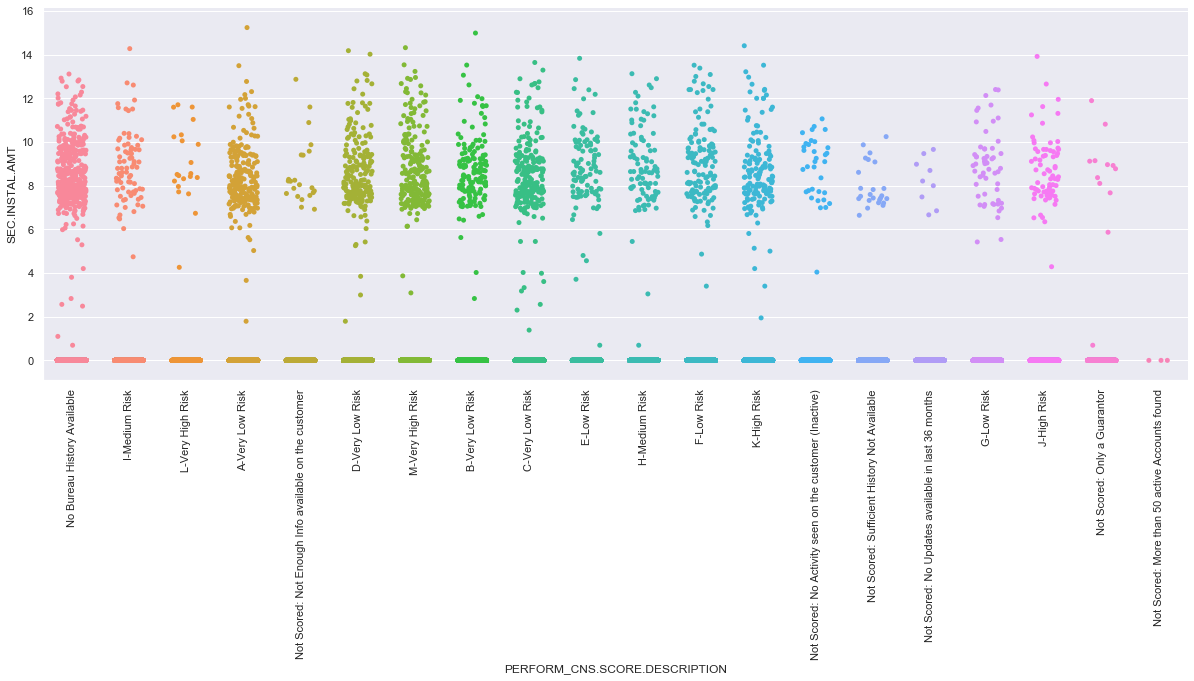

In [65]:
sns.catplot(x='PERFORM_CNS.SCORE.DESCRIPTION', y='SEC.INSTAL.AMT', data= df_train, jitter = "0.25", height=6, aspect=3).set_xticklabels(rotation=90)

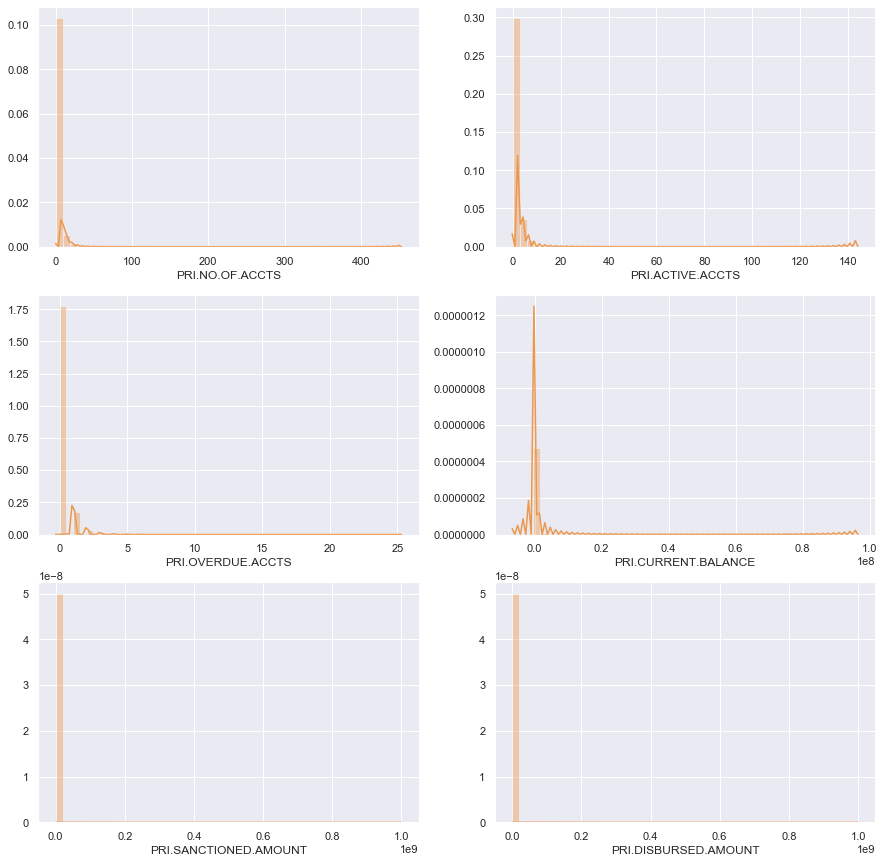

In [66]:
sns.set(rc={'figure.figsize':(15,15)})
fig, ax =plt.subplots(3,2)
sns.distplot(df_train["PRI.NO.OF.ACCTS"], color = "#EB974E" , kde_kws={'bw': 0.1}, ax=ax[0,0])
sns.distplot(df_train["PRI.ACTIVE.ACCTS"], color = "#EB974E" , kde_kws={'bw': 0.1}, ax=ax[0,1])
sns.distplot(df_train["PRI.OVERDUE.ACCTS"], color = "#EB974E" , kde_kws={'bw': 0.1}, ax=ax[1,0])
sns.distplot(df_train["PRI.CURRENT.BALANCE"], color = "#EB974E" , kde_kws={'bw': 0.1}, ax=ax[1,1])
sns.distplot(df_train["PRI.SANCTIONED.AMOUNT"], color = "#EB974E" , kde_kws={'bw': 0.1}, ax=ax[2,0])
sns.distplot(df_train["PRI.DISBURSED.AMOUNT"], color = "#EB974E" , kde_kws={'bw': 0.1}, ax=ax[2,1])

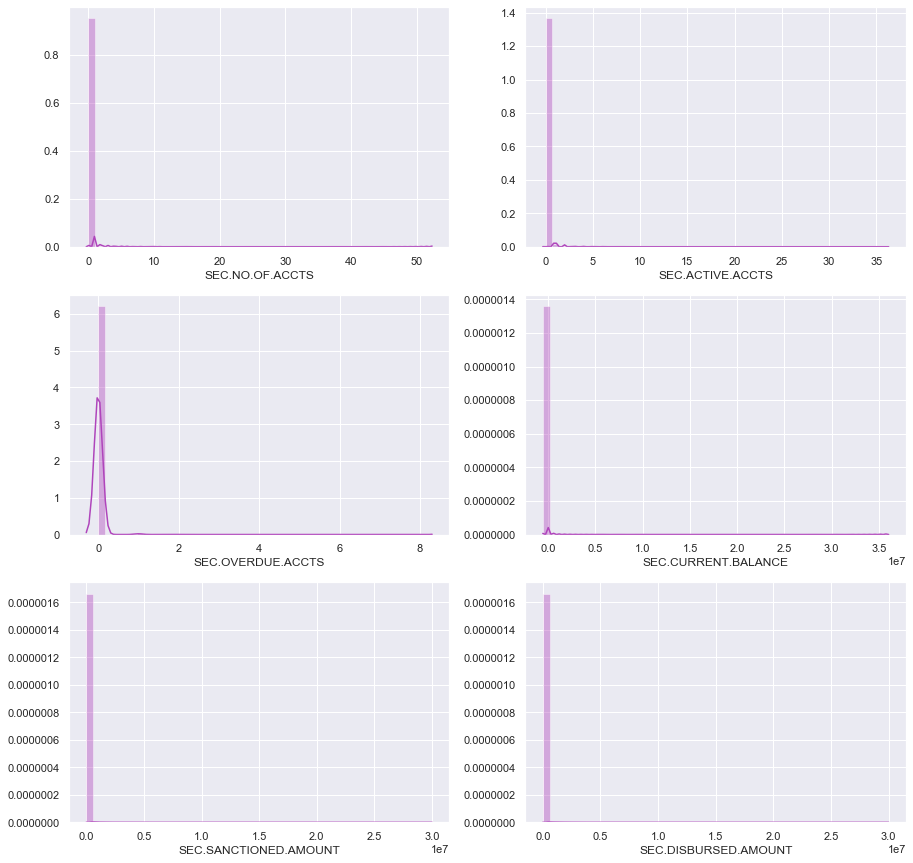

In [67]:
sns.set(rc={'figure.figsize':(15,15)})
fig, ax =plt.subplots(3,2)
sns.distplot(df_train["SEC.NO.OF.ACCTS"], color = "#af44bb" , kde_kws={'bw': 0.1}, ax=ax[0,0])
sns.distplot(df_train["SEC.ACTIVE.ACCTS"], color = "#af44bb" , kde_kws={'bw': 0.1}, ax=ax[0,1])
sns.distplot(df_train["SEC.OVERDUE.ACCTS"], color = "#af44bb" , kde_kws={'bw': 0.1}, ax=ax[1,0])
sns.distplot(df_train["SEC.CURRENT.BALANCE"], color = "#af44bb" , kde_kws={'bw': 0.1}, ax=ax[1,1])
sns.distplot(df_train["SEC.SANCTIONED.AMOUNT"], color = "#af44bb" , kde_kws={'bw': 0.1}, ax=ax[2,0])
sns.distplot(df_train["SEC.DISBURSED.AMOUNT"], color = "#af44bb" , kde_kws={'bw': 0.1}, ax=ax[2,1])

In [68]:
#correlation heatmap

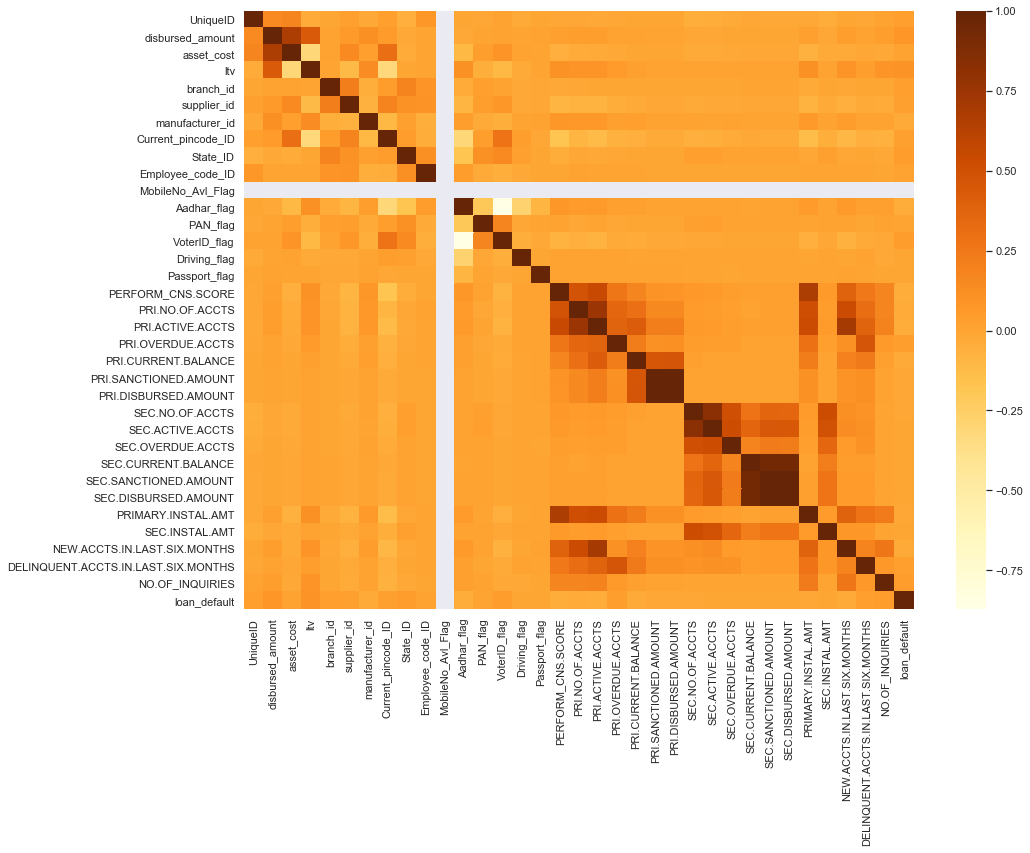

In [69]:
plt.figure(figsize=(15,11))
corr = df_train.corr()
sns.heatmap(corr, annot = False, cmap = "YlOrBr")
plt.show()

In [70]:
#returns correlation values
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [71]:
correlated_features = correlation(df_train, 0.7)
len(set(correlated_features))

7

In [72]:
correlated_features

{'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'PRI.ACTIVE.ACCTS',
 'PRI.DISBURSED.AMOUNT',
 'SEC.ACTIVE.ACCTS',
 'SEC.DISBURSED.AMOUNT',
 'SEC.SANCTIONED.AMOUNT',
 'VoterID_flag'}

# FEATURE ENGINEERING

Brief description of feature engineering:

1) Observed the data types and found 6 features with "Object" datatypes which must be converted to numerical values before giving the data to ML model.

2) Converted the Date.of.Birth feature with object datatype into AGE with numerical value and plotted the histogram for the same for ease of analysis

3) Label Encoded Employment.Type (Two unique values inside the feature was converted into "0" and "1" respectively

4) Reduced the unique values PERFORM_CNS.SCORE.DESCRIPTION by Combining and renaming Various unscored data into one umbrella of "Not scored"

5) Label encoded and One hot encoded the PERFORM_CNS.SCORE.DESCRIPTION

6) Converted the DisbursalDate with object data type into a feature with numerical values signifying Number of days since disbursal and plotted the histogram of the ame for ease of analysis

7) Converted AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH with Object datatype into Number of months. Plotted the histogram for the same.


In [73]:
df_train.dtypes

UniqueID                                 int64
disbursed_amount                       float64
asset_cost                             float64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                      float64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [74]:
#converting to age in years
from pandas import DataFrame
from datetime import date 
import datetime

age_list_train = df_train['Date.of.Birth'].tolist()
age_years_train = []

#conversion of  date into age
for i in range(0, len(df_train)):
    today = date.today()
    format_str = '%d-%m-%y' # The format
    datetime_obj = datetime.datetime.strptime(age_list_train[i], format_str)
    age = today.year - datetime_obj.year - ((today.month, today.day) < (datetime_obj.month, datetime_obj.day))
    age_years_train.append(age)
    i += 1
    
#correction of years below 1970 giving negative values
age_years_corrected_train = []
for j in age_years_train:
    if j > 0:
        age_years_corrected_train.append(j)
    if j < 0:
        j = 100+j
        age_years_corrected_train.append(j)
        
ages_train = DataFrame (age_years_corrected_train,columns=['AGE'])
df_train.insert(7, 'AGE', ages_train)



df_train

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,AGE,Current_pincode_ID,Date.of.Birth,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,10.831272,10.975071,662254.268439,67,22807,45,37,1441,01-01-84,...,0,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,10.760983,11.090568,344821.242843,67,22807,45,35,1502,31-07-85,...,0,0,7.596894,0.0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,10.883279,11.024513,664175.308147,67,22807,45,35,1497,24-08-85,...,0,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,10.959766,11.099121,636928.478012,67,22807,45,27,1501,30-12-93,...,0,0,3.465736,0.0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,10.866242,11.007087,634829.323723,67,22807,45,43,1495,09-12-77,...,0,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,11.054265,11.565565,187796.880257,34,20700,48,32,1050,01-08-88,...,0,0,8.315077,0.0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,11.207093,11.518908,371791.806898,34,23775,51,32,990,05-12-88,...,0,0,7.356280,0.0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,10.418823,11.173417,90297.076197,77,22186,86,44,2299,01-06-76,...,0,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,10.441705,11.202125,94286.133670,77,22186,86,27,2299,26-03-94,...,0,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0


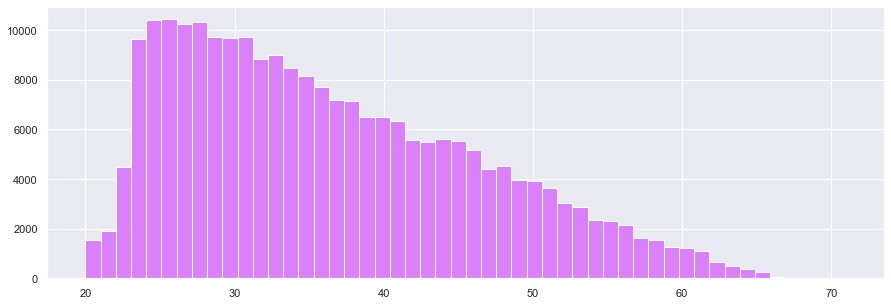

In [75]:
plt.figure(figsize=(15,5))
df_train['AGE'].hist(bins=50, color = "#D980FA")

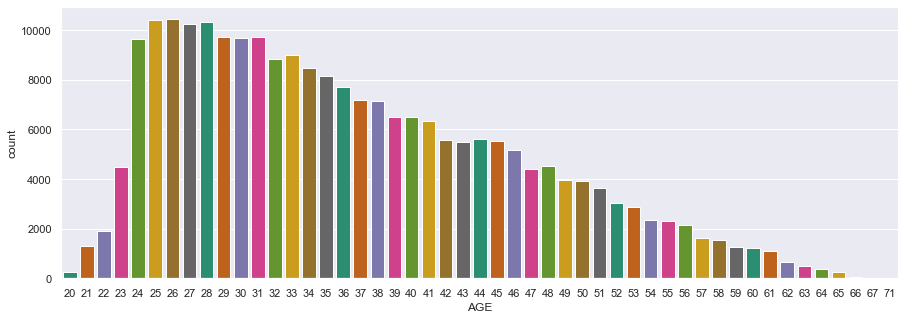

In [76]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["AGE"], palette= "Dark2")

In [77]:
#label encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_train['Employment_Type'] = labelencoder.fit_transform(df_train['Employment.Type'])
df_train

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,AGE,Current_pincode_ID,Date.of.Birth,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment_Type
0,420825,10.831272,10.975071,662254.268439,67,22807,45,37,1441,01-01-84,...,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
1,537409,10.760983,11.090568,344821.242843,67,22807,45,35,1502,31-07-85,...,0,7.596894,0.0,0,1,1yrs 11mon,1yrs 11mon,0,1,1
2,417566,10.883279,11.024513,664175.308147,67,22807,45,35,1497,24-08-85,...,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
3,624493,10.959766,11.099121,636928.478012,67,22807,45,27,1501,30-12-93,...,0,3.465736,0.0,0,0,0yrs 8mon,1yrs 3mon,1,1,1
4,539055,10.866242,11.007087,634829.323723,67,22807,45,43,1495,09-12-77,...,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,11.054265,11.565565,187796.880257,34,20700,48,32,1050,01-08-88,...,0,8.315077,0.0,0,0,1yrs 9mon,3yrs 3mon,0,0,0
233150,606141,11.207093,11.518908,371791.806898,34,23775,51,32,990,05-12-88,...,0,7.356280,0.0,0,0,0yrs 6mon,0yrs 6mon,0,0,1
233151,613658,10.418823,11.173417,90297.076197,77,22186,86,44,2299,01-06-76,...,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
233152,548084,10.441705,11.202125,94286.133670,77,22186,86,27,2299,26-03-94,...,0,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0,0


In [78]:
#converting to number of days
today = pd.Timestamp('now')
df_train['DisbursalDate'] = pd.to_datetime(df_train['DisbursalDate'], format='%d-%m-%y')

df_train['Days_since_disbursal'] = (today - df_train['DisbursalDate'])
df_train['Days_since_disbursal']= df_train['Days_since_disbursal'].astype(str)
df_train[['Days_since_disbursal','delta']] = df_train['Days_since_disbursal'].str.split("days",expand=True)
df_train['Days_since_disbursal']= df_train['Days_since_disbursal'].astype(str).astype(int)
df_train = df_train.drop(columns= ['delta'])
df_train

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,AGE,Current_pincode_ID,Date.of.Birth,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment_Type,Days_since_disbursal
0,420825,10.831272,10.975071,662254.268439,67,22807,45,37,1441,01-01-84,...,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,999
1,537409,10.760983,11.090568,344821.242843,67,22807,45,35,1502,31-07-85,...,7.596894,0.0,0,1,1yrs 11mon,1yrs 11mon,0,1,1,945
2,417566,10.883279,11.024513,664175.308147,67,22807,45,35,1497,24-08-85,...,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0,1,1001
3,624493,10.959766,11.099121,636928.478012,67,22807,45,27,1501,30-12-93,...,3.465736,0.0,0,0,0yrs 8mon,1yrs 3mon,1,1,1,915
4,539055,10.866242,11.007087,634829.323723,67,22807,45,43,1495,09-12-77,...,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,1,1,1,945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,11.054265,11.565565,187796.880257,34,20700,48,32,1050,01-08-88,...,8.315077,0.0,0,0,1yrs 9mon,3yrs 3mon,0,0,0,915
233150,606141,11.207093,11.518908,371791.806898,34,23775,51,32,990,05-12-88,...,7.356280,0.0,0,0,0yrs 6mon,0yrs 6mon,0,0,1,918
233151,613658,10.418823,11.173417,90297.076197,77,22186,86,44,2299,01-06-76,...,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,917
233152,548084,10.441705,11.202125,94286.133670,77,22186,86,27,2299,26-03-94,...,0.000000,0.0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,942


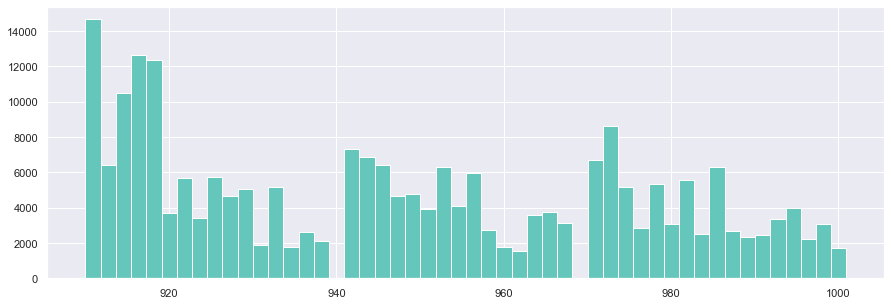

In [79]:
df_train['Days_since_disbursal'].hist(bins=50, color = "#65C6BB")

In [80]:
#reducing number of unique values
df_train['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['Not Scored: More than 50 active Accounts found', 
                                                         'Not Scored: No Activity seen on the customer (Inactive)',
                                                         'Not Scored: No Updates available in last 36 months',
                                                         'Not Enough Info available on the customer','Not Scored: Only a Guarantor',
                                                         'Not Scored: Sufficient History Not Available',
                                                         'Not Scored: Not Enough Info available on the customer'], value= 'Not Scored', inplace = True)

In [81]:
#reduced unique values
df_train["PERFORM_CNS.SCORE.DESCRIPTION"].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk', 'Not Scored', 'D-Very Low Risk',
       'M-Very High Risk', 'B-Very Low Risk', 'C-Very Low Risk',
       'E-Low Risk', 'H-Medium Risk', 'F-Low Risk', 'K-High Risk',
       'G-Low Risk', 'J-High Risk'], dtype=object)

In [82]:
#label and OneHotEncoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder = LabelEncoder()
df_train['PCSD_LE'] = labelencoder.fit_transform(df_train['PERFORM_CNS.SCORE.DESCRIPTION'])
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_train[['PCSD_LE']]).toarray())
df_train = df_train.join(enc_df)
df_train

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,AGE,Current_pincode_ID,Date.of.Birth,...,5,6,7,8,9,10,11,12,13,14
0,420825,10.831272,10.975071,662254.268439,67,22807,45,37,1441,01-01-84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,537409,10.760983,11.090568,344821.242843,67,22807,45,35,1502,31-07-85,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,417566,10.883279,11.024513,664175.308147,67,22807,45,35,1497,24-08-85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,624493,10.959766,11.099121,636928.478012,67,22807,45,27,1501,30-12-93,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,539055,10.866242,11.007087,634829.323723,67,22807,45,43,1495,09-12-77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,11.054265,11.565565,187796.880257,34,20700,48,32,1050,01-08-88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233150,606141,11.207093,11.518908,371791.806898,34,23775,51,32,990,05-12-88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233151,613658,10.418823,11.173417,90297.076197,77,22186,86,44,2299,01-06-76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
233152,548084,10.441705,11.202125,94286.133670,77,22186,86,27,2299,26-03-94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
#converting both features into number of months respectively

In [84]:
df = df_train["AVERAGE.ACCT.AGE"].str.split(expand=True)
df1 = df[0].str.split('yrs',expand=True)
df2 = df[1].str.split('mon',expand=True)
df1[0] = df1[0].astype(int)
df2[0] = df2[0].astype(int)
df["Avg_Acc_Age_Months"] = (df1[0]*12) + df2[0]
df_train["AVERAGE.ACCT.AGE"] = df["Avg_Acc_Age_Months"]

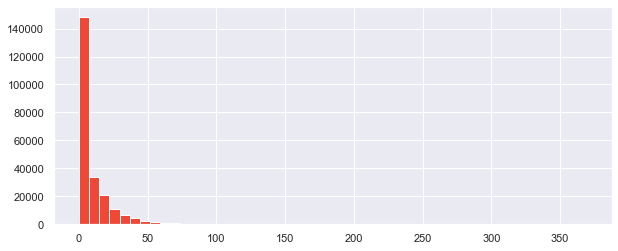

In [85]:
plt.figure(figsize=(10,4))
df_train['AVERAGE.ACCT.AGE'].hist(bins=50, color = "#EF4836")

In [86]:
df = df_train["CREDIT.HISTORY.LENGTH"].str.split(expand=True)
df1 = df[0].str.split('yrs',expand=True)
df2 = df[1].str.split('mon',expand=True)
df1[0] = df1[0].astype(int)
df2[0] = df2[0].astype(int)
df["Avg_Acc_Age_Months"] = (df1[0]*12) + df2[0]
df_train["CREDIT.HISTORY.LENGTH"] = df["Avg_Acc_Age_Months"]

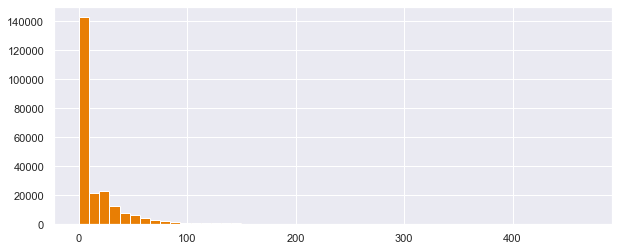

In [87]:
plt.figure(figsize=(10,4))
df_train['CREDIT.HISTORY.LENGTH'].hist(bins=50, color = "#E87E04")

# FEATURE SELECTION

Brief description for feature selection :

1) UniqueID had all unique values, MobileNo_Avl_Flag had only a single value, both were dropped. 

2) Removed the highly correlated values (> 0.7) to remove redundancy.

3) Removed other additional leftover columns created due to feature engineering

4) Final data set had the following dimensions (233154, 46)

In [88]:
df_train.dtypes

UniqueID                                        int64
disbursed_amount                              float64
asset_cost                                    float64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
AGE                                             int64
Current_pincode_ID                              int64
Date.of.Birth                                  object
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                

In [89]:
df_train.drop(["UniqueID","MobileNo_Avl_Flag"], axis=1, inplace = True)

In [90]:
df_train.drop(["Date.of.Birth","Employment.Type","DisbursalDate","PERFORM_CNS.SCORE.DESCRIPTION","PCSD_LE"], axis=1, inplace = True)

In [91]:
df_train.drop(correlated_features, axis=1, inplace = True)

In [92]:
df_train.shape

(233154, 46)

In [93]:
df_train.dtypes

disbursed_amount                       float64
asset_cost                             float64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
AGE                                      int64
Current_pincode_ID                       int64
State_ID                                 int64
Employee_code_ID                         int64
Aadhar_flag                              int64
PAN_flag                                 int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                      float64
PRI.NO.OF.ACCTS                          int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONED.AMOUNT                    int64
SEC.NO.OF.ACCTS                          int64
SEC.OVERDUE.ACCTS                        int64
SEC.CURRENT.B

# MODEL CREATION with Hyperparameter Optimization

Brief Description

1) Performed scaling on the data

2) Performed PCA for reduction in dimensionality ( 46 to 10 ) to improve the process speed

3) Train test split of the data into (80/20)

4) Implemented DT, NB, RF, LR, KNN and performed hyperparameter optimization for each algorithm using GridsearchCV / RandomSearchCV

In [94]:
X = df_train.drop("loan_default", axis =1)
y = df_train["loan_default"]

In [95]:
#Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [96]:
#PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

In [98]:
#HANDLING IMBALANCED LABEL 

In [99]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import NearMiss

In [100]:
os=RandomOverSampler(0.9)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 145929, 1: 40594})
The number of classes after fit Counter({0: 145929, 1: 131336})


In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


**1) DECISION TREE**

In [103]:
#best hyperparameters
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='auto')

In [102]:
#building DT model with best hyperparameters
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='auto')

DecisionTree.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='auto')

In [103]:
y_pred_dt = DecisionTree.predict(X_test)

In [104]:
#kfolds cross validated output
kf = StratifiedKFold(n_splits=10)
predicted_dt = cross_val_predict(DecisionTree, X_train_ns, y_train_ns, cv=kf)
print('Accuracy Score :',accuracy_score(y_train_ns, predicted_dt))
print('Report : ')
print(classification_report(y_train_ns, predicted_dt))

Accuracy Score : 0.7716480623230484
Report : 
              precision    recall  f1-score   support

           0       0.84      0.70      0.76    145929
           1       0.72      0.85      0.78    131336

    accuracy                           0.77    277265
   macro avg       0.78      0.78      0.77    277265
weighted avg       0.78      0.77      0.77    277265



**2) NAIVE BAYES**

In [115]:
#best hyperparameters
Gauss_NB.best_estimator_

GaussianNB(var_smoothing=0.0015199110829529332)

In [105]:
#building NB model with best hyperparameters
GaussNB = GaussianNB(var_smoothing=0.0015199110829529332)
GaussNB.fit(X_train_ns, y_train_ns)

GaussianNB(var_smoothing=0.0015199110829529332)

In [106]:
y_pred_gNB = GaussNB.predict(X_test)

In [109]:
#cross validated output
skf = StratifiedKFold(n_splits=10)
predicted_nb = cross_val_predict(GaussNB, X_train_ns, y_train_ns, cv=skf)
print('Accuracy Score :',accuracy_score(y_train_ns, predicted_nb))
print('Report : ')
print(classification_report(y_train_ns, predicted_nb))

Accuracy Score : 0.5691522550628461
Report : 
              precision    recall  f1-score   support

           0       0.57      0.71      0.63    145929
           1       0.56      0.41      0.47    131336

    accuracy                           0.57    277265
   macro avg       0.57      0.56      0.55    277265
weighted avg       0.57      0.57      0.56    277265



**3) RANDOM FOREST**

In [113]:
#building RF model with best hyperparameters
RndmFrst = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RndmFrst.fit(X_train_ns, y_train_ns)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [114]:
y_pred_rf = RndmFrst.predict(X_test)

In [118]:
skf = StratifiedKFold(n_splits=10)
predicted_rf = cross_val_predict(RndmFrst, X_train_ns, y_train_ns, cv=skf)
print('Accuracy Score :',accuracy_score(y_train_ns, predicted_rf))
print('Report : ')
print(classification_report(y_train_ns, predicted_rf))

Accuracy Score : 0.5656501902512038
Report : 
              precision    recall  f1-score   support

           0       0.57      0.75      0.65    145929
           1       0.57      0.36      0.44    131336

    accuracy                           0.57    277265
   macro avg       0.57      0.56      0.54    277265
weighted avg       0.57      0.57      0.55    277265



**4) Logistic Regression**

In [132]:
#best hyperparameters
logreg_grid.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
#building LR model with best hyperparameters
LogReg = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogReg.fit(X_train_ns, y_train_ns)

LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [120]:
y_pred_lr = LogReg.predict(X_test)

In [124]:
skf = StratifiedKFold(n_splits=10)
predicted_lr = cross_val_predict(LogReg, X_train_ns, y_train_ns, cv=skf)
print('Accuracy Score :',accuracy_score(y_train_ns, predicted_lr))
print('Report : ')
print(classification_report(y_train_ns, predicted_lr))

Accuracy Score : 0.5665518547238202
Report : 
              precision    recall  f1-score   support

           0       0.60      0.52      0.56    145929
           1       0.54      0.62      0.58    131336

    accuracy                           0.57    277265
   macro avg       0.57      0.57      0.57    277265
weighted avg       0.57      0.57      0.57    277265



**5) KNN**

In [ ]:
#I had implemented the hyperparameter tuning of knn for this dataset in another notebook.
#Hence, copy pasting the code here and directly applying the tuned hyperparameters to the model

"""

gs = {'n_neighbors' : np.arange(1,25)}
knn_gs = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_gs, gs, cv = 2)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform'),
iid='deprecated', n_jobs=None, param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20, 21, 22, 23, 24])},
pre_dispatch='2*n_jobs', refit=True, return_train_score=False, scoring=None, verbose=0)
             
             
knn_grid.best_estimator_
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')
                     
                     

                     
"""

In [125]:
#building KNN model with best hyperparameters
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [126]:
KNN.fit(X_train_ns, y_train_ns)

KNeighborsClassifier(n_neighbors=24)

In [127]:
ypred_knn = KNN.predict(X_test)

In [129]:
skf = StratifiedKFold(n_splits=10)
predicted_rf = cross_val_predict(KNN, X_train_ns, y_train_ns, cv=skf)
print('Accuracy Score :',accuracy_score(y_train_ns, predicted_rf))
print('Report : ')
print(classification_report(y_train_ns, predicted_rf))

Accuracy Score : 0.6203704037653508
Report : 
              precision    recall  f1-score   support

           0       0.63      0.66      0.65    145929
           1       0.60      0.58      0.59    131336

    accuracy                           0.62    277265
   macro avg       0.62      0.62      0.62    277265
weighted avg       0.62      0.62      0.62    277265



In [130]:
from sklearn.ensemble import VotingClassifier

In [131]:
labels = ['DT', 'NB', 'RF', 'LR', 'KNN']

In [132]:
voting_clf_h = VotingClassifier(estimators = [(labels[0], DecisionTree), (labels[1], GaussNB), (labels[2], RndmFrst), (labels[3], LogReg), (labels[4], KNN)], voting = 'hard')
voting_clf_s = VotingClassifier(estimators = [(labels[0], DecisionTree), (labels[1], GaussNB), (labels[2], RndmFrst), (labels[3], LogReg), (labels[4], KNN)], voting = 'soft')

In [133]:
voting_clf_h.fit(X_train_ns,y_train_ns)
Y_h = voting_clf_h.predict(X_test)
print(accuracy_score(y_test, Y_h))

0.6463940297227166


In [134]:
voting_clf_s.fit(X_train_ns,y_train_ns)
Y_s = voting_clf_s.predict(X_test)
print(accuracy_score(y_test, Y_s))

0.6526130685595419
